In [1]:

pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
import easyocr
reader = easyocr.Reader(['ru']) # this needs to run only once to load the model into memory
result = reader.readtext('../data/6.png')

In [3]:
result

[([[np.int32(11), np.int32(10)],
   [np.int32(265), np.int32(10)],
   [np.int32(265), np.int32(30)],
   [np.int32(11), np.int32(30)]],
  'МОСКОВСКИЙ ИНДУСТРИАЛЬНЫЙ БАНК',
  np.float64(0.9996770063036997)),
 ([[np.int32(519), np.int32(13)],
   [np.int32(547), np.int32(13)],
   [np.int32(547), np.int32(29)],
   [np.int32(519), np.int32(29)]],
  'БИК',
  np.float64(0.9999926356734838)),
 ([[np.int32(567), np.int32(13)],
   [np.int32(635), np.int32(13)],
   [np.int32(635), np.int32(29)],
   [np.int32(567), np.int32(29)]],
  '044525600',
  np.float64(0.9999633736891506)),
 ([[np.int32(567), np.int32(37)],
   [np.int32(711), np.int32(37)],
   [np.int32(711), np.int32(57)],
   [np.int32(567), np.int32(57)]],
  '30101810400000000225',
  np.float64(0.9994563070186592)),
 ([[np.int32(12), np.int32(64)],
   [np.int32(90), np.int32(64)],
   [np.int32(90), np.int32(72)],
   [np.int32(12), np.int32(72)]],
  '=анк петлатетя',
  np.float64(0.1437557719460904)),
 ([[np.int32(11), np.int32(85)],
   [np.

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_easyocr_boxes(image_path, ocr_result):
    """
    Plots bounding boxes and recognized text from EasyOCR results on the image.

    Args:
        image_path (str): Path to the image file.
        ocr_result (list): Output from easyocr.Reader().readtext()
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for matplotlib

    for detection in ocr_result:
        box, text, score = detection
        box = np.array(box).astype(int)

        # Draw bounding box
        cv2.polylines(image, [box], isClosed=True, color=(0, 255, 0), thickness=2)



    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Detected Text with Bounding Boxes")
    plt.show()


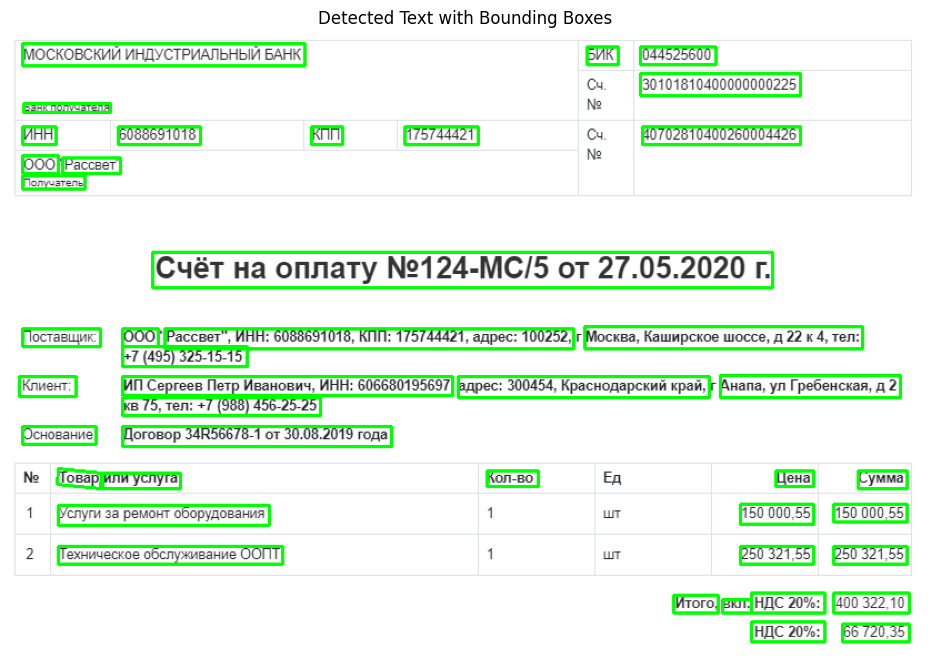

In [5]:
plot_easyocr_boxes('../data/6.png', result)

In [6]:
import json

def easyocr_to_json(ocr_result):
    """
    Converts EasyOCR output to a JSON-serializable structure.

    Args:
        ocr_result (list): Output from easyocr.Reader().readtext()

    Returns:
        list: List of dicts with 'text' and 'bbox' keys.
    """
    output = []
    for detection in ocr_result:
        box, text, score = detection
        bbox = [[int(point[0]), int(point[1])] for point in box]  # convert np.int32 to int
        output.append({
            "text": text,
            "bbox": bbox,
            "confidence": float(score)
        })
    return output

# Example usage:
# result = reader.readtext('your_image.jpg')
data = easyocr_to_json(result)
with open('ocr_output.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)
